The dataset is from the U.S. Small Business Administration (SBA)

The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

In this final project, I will build a model whether the loan is approved or not based on the given term and loan condition.

Columns

LoanNr_ChkDgt : Identifier
Name : Borrower Name
City : Borrower City
State : Borrower State
Zip : Borrower Zip Code
Bank : Bank Name
BankState : Bank State
NAICS : North American industry classification system code.
ApprovalDate : Date SBA commitment issued
ApprovalFY : Fiscal year of commitment
Term : Loan term in months
NoEmp : Number of Business Employees
NewExist : 1 = Existing business, 2 = New business
CreateJob : Number of Jobs Created
RetainedJob : Number of jobs retained
FranchiseCode : Franchise code, (00000 or 00001) = No franchise
UrbanRural : 1 = Urban, 2 = rural, 0 = undefined
RevLineCr : Revolving line of credit: Y = Yes, N = No
LowDoc : LowDoc Loan Program: Y = Yes, N = No
ChgOffDate : The date when a loan is declared to be in default
DisbursementDate : Disbursement date
DisbursementGross : Amount disbursed
BalanceGross : Gross amount outstanding
MIS_Status : Loan status charged off = CHGOFF, Paid in full = PIF
ChgOffPrinGr : Charged-off amount
GrAppv : Gross amount of loan approved by bank
SBA_Appv : SBA's guaranteed amount of approved loan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('SBAnational.csv')
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_29708\2915760485.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
len(df)

899164

#The first step of this project is to identify the dataset and its feature through exploratory data analysis (EDA). In this step we will analyze the type and condition from all feature from Small Business Administration Dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [6]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [7]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2),
                      df[col].nunique(), list(df[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [8]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,LoanNr_ChkDgt,int64,0,0.00,899164,"[9306634000, 5369305001, 1849395007, 842237400..."
1,Name,object,14,0.00,779583,"[SHAGGS SURF & SPORT, INC., TIMNA L.L. HUGHES,..."
2,City,object,30,0.00,32581,"[HOLLY, POPLAR BLUFF, WILSON, HONOLULU, WACO]"
3,State,object,14,0.00,51,"[MA, NY, CA, TX, IL]"
4,Zip,int64,0,0.00,33611,"[36608, 58045, 94596, 83704, 99208]"
5,Bank,object,1559,0.17,5802,"[PNC BANK, NATIONAL ASSOCIATION, KITSAP BANK, ..."
6,BankState,object,1566,0.17,56,"[OH, CA, RI, TX, PA]"
7,NAICS,int64,0,0.00,1312,"[0, 722211, 561730, 422430]"
8,ApprovalDate,object,0,0.00,9859,"[2-Sep-92, 16-Apr-04, 10-Apr-97, 22-Jul-92, 9-..."
9,ApprovalFY,object,0,0.00,70,"[2003, 2005, 1993, 2007]"


1. Feature Selection
After conducting exploratory data analysis, the next step is to do a feature selection by analyzing the correlation between all features and target features.

Target Feature (Y)
The feature that will be labeled as the target is the MIS_Status feature. Where in this feature explains which borrower cannot repay loans.

Train Feature (X)
1. Personal & Institusion Information Feature

From SBA Data Frame we can make a conclusion that there are seven column that give personal and instituion information

LoanNr_ChkDgt as borrower Identifeir
Name as Borrower Name
City as Borrower City
State as Borrower State
Zip as Borrower Zip Code
Bank as Bank Name
BankState as Bank State
FranchiseCode as FranchiseCode
UrbanRural as information about business
This information is used only to identify the borrower and the Bank. With that reason we not use this feature for future modeling.

2. NAICS (North American industry classification system code)

NAICS is a classification system of several types of industries registered in America. The first two digits of NAICS explained the type of business industries.

NAICS itself has the potential for decision making. The type of industry will affect the company's performance in business. So that this feature will be used later in the model.

3. Date and Time Feature

It's dataset contained some feature that explains the date of commitment and disbursement.

ApprovalDate : Date SBA commitment issued
ApprovalFY : Fiscal year of commitment
ChgOffDate : The date when a loan is declared to be in default
DisbursementDate : Disbursement date
Because the model will be deployed following the operating time of the Bank, this feature is used only for additional information and not for modeling.

4. Term

The term provides information on how long the loan will take. Concerning the rules of risk management, the longer the duration, the greater the uncertainty that will lead to risk. So this feature will be used as a reference for modeling.

5. Jobs Columns

This feature explains how many employees are in the related business and how many jobs were created and existed before.

In this dataset there are three features: NoEmp, CreateJob dan RetainedJob

In [9]:
def outliers(DataFrame,Series):
    iqr = Series.quantile(.75) - Series.quantile(.25)
    lower_bound = Series.quantile(.25) - (1.5*iqr)
    upper_bound = Series.quantile(.75) + (1.5*iqr)
    return DataFrame[(Series >= upper_bound) | (Series <= lower_bound)]

In [10]:
print(f'Percentage of outliers: {round(len(outliers(df,df.NoEmp))/len(df.NoEmp)*100,2)}%')

Percentage of outliers: 11.39%


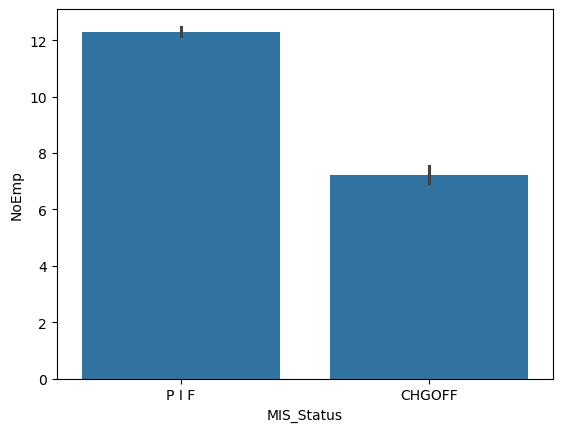

In [11]:
sns.barplot(x=df.MIS_Status, y=df['NoEmp'])
plt.show()

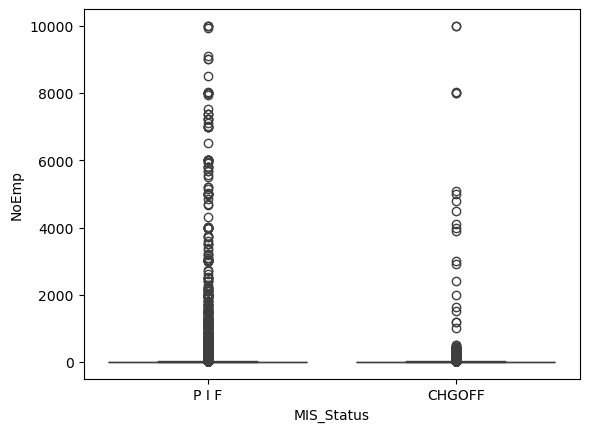

In [12]:
sns.boxplot(x=df.MIS_Status, y=df['NoEmp'])
plt.show()

In [13]:
print(f'Percentage of outliers: {round(len(outliers(df,df.CreateJob	))/len(df.CreateJob	)*100,2)}%')

Percentage of outliers: 16.56%


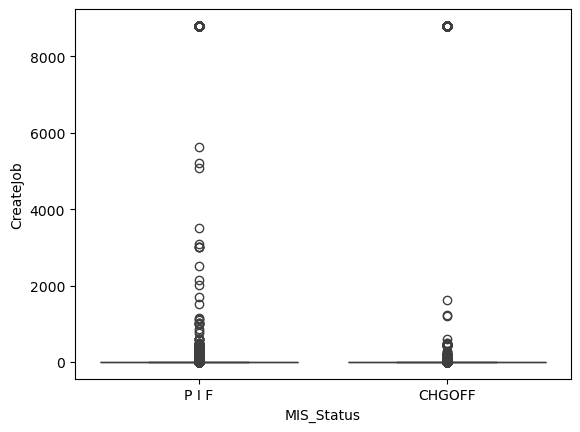

In [14]:
sns.boxplot(x=df.MIS_Status, y=df['CreateJob'])
plt.show()

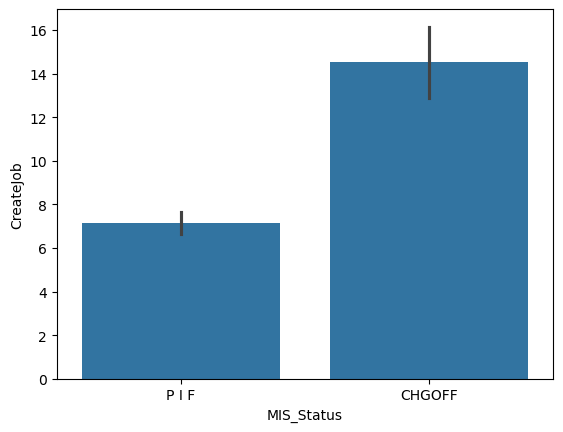

In [15]:
sns.barplot(x=df.MIS_Status, y=df['CreateJob'])
plt.show()

In [16]:
print(f'Percentage of outliers: {round(len(outliers(df,df.RetainedJob))/len(df.RetainedJob)*100,2)}%')

Percentage of outliers: 11.8%


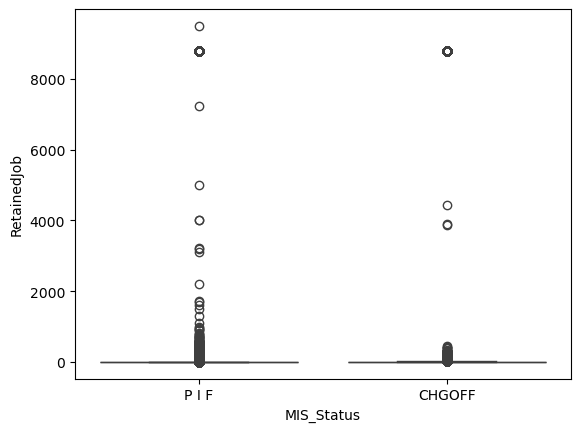

In [17]:
sns.boxplot(x=df.MIS_Status, y=df['RetainedJob'])
plt.show()

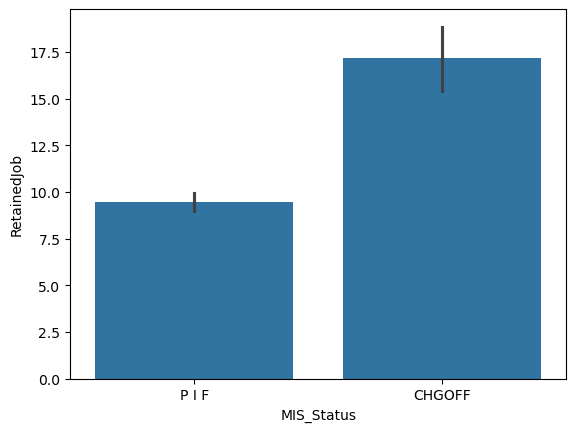

In [18]:
sns.barplot(x=df.MIS_Status, y=df['RetainedJob'])
plt.show()

In [19]:
df[['NoEmp','CreateJob','RetainedJob']].corr()

,NoEmp,CreateJob,RetainedJob
NoEmp,1.000000,0.008626,0.015350
CreateJob,0.008626,1.000000,0.993953
RetainedJob,0.015350,0.993953,1.000000


In [20]:
df.NewExist.unique()

array([ 2.,  1.,  0., nan])

In [ ]:
sns.countplot(df.NewExist)
plt.show()

In [20]:
data = df.drop(['LoanNr_ChkDgt', 'Name','City', 'State', 'Zip','Bank','BankState','ApprovalDate','ApprovalFY',
                 'NoEmp','CreateJob','RetainedJob','FranchiseCode','UrbanRural', 'ChgOffDate','DisbursementDate','BalanceGross',
                 'DisbursementGross','ChgOffPrinGr'], axis=1)

In [21]:
data

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,451120,84,2.0,N,Y,P I F,"$60,000.00","$48,000.00"
1,722410,60,2.0,N,Y,P I F,"$40,000.00","$32,000.00"
2,621210,180,1.0,N,N,P I F,"$287,000.00","$215,250.00"
3,0,60,1.0,N,Y,P I F,"$35,000.00","$28,000.00"
4,0,240,1.0,N,N,P I F,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...
899159,451120,60,1.0,0,N,P I F,"$70,000.00","$56,000.00"
899160,451130,60,1.0,Y,N,P I F,"$85,000.00","$42,500.00"
899161,332321,108,1.0,N,N,P I F,"$300,000.00","$225,000.00"
899162,0,60,1.0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


In [22]:
data.MIS_Status.value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NAICS       899164 non-null  int64  
 1   Term        899164 non-null  int64  
 2   NewExist    899028 non-null  float64
 3   RevLineCr   894636 non-null  object 
 4   LowDoc      896582 non-null  object 
 5   MIS_Status  897167 non-null  object 
 6   GrAppv      899164 non-null  object 
 7   SBA_Appv    899164 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 54.9+ MB


In [24]:
data.dropna(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889938 entries, 0 to 899163
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NAICS       889938 non-null  int64  
 1   Term        889938 non-null  int64  
 2   NewExist    889938 non-null  float64
 3   RevLineCr   889938 non-null  object 
 4   LowDoc      889938 non-null  object 
 5   MIS_Status  889938 non-null  object 
 6   GrAppv      889938 non-null  object 
 7   SBA_Appv    889938 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 61.1+ MB


In [26]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100,2),
                      data[col].nunique(), list(data[col].sample(5).drop_duplicates().values)])

dataDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [27]:
dataDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,NAICS,int64,0,0.0,1311,"[722330, 721110, 441110, 812320, 541430]"
1,Term,int64,0,0.0,411,"[240, 60, 84]"
2,NewExist,float64,0,0.0,3,"[1.0, 2.0]"
3,RevLineCr,object,0,0.0,18,"[0, N]"
4,LowDoc,object,0,0.0,8,[N]
5,MIS_Status,object,0,0.0,2,[P I F]
6,GrAppv,object,0,0.0,21958,"[$25,000.00 , $10,000.00 , $63,000.00 , $50,00..."
7,SBA_Appv,object,0,0.0,38033,"[$750,000.00 , $317,250.00 , $639,000.00 , $2,..."


In [28]:
for x in data[['NewExist', 'RevLineCr','LowDoc','MIS_Status']].columns:
    print(f'{x}: \n{data[x].unique()}\n')

NewExist: 
[2. 1. 0.]

RevLineCr: 
['N' '0' 'Y' 'T' '`' ',' '1' 'C' '3' '2' 'R' '7' 'A' '5' '.' '4' '-' 'Q']

LowDoc: 
['Y' 'N' 'C' '1' 'S' 'R' 'A' '0']

MIS_Status: 
['P I F' 'CHGOFF']



In [29]:
data[data['NAICS']==0]

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
3,0,60,1.0,N,Y,P I F,"$35,000.00","$28,000.00"
4,0,240,1.0,N,N,P I F,"$229,000.00","$229,000.00"
6,0,45,2.0,N,N,CHGOFF,"$600,000.00","$499,998.00"
9,0,84,2.0,N,Y,P I F,"$70,000.00","$56,000.00"
13,0,120,2.0,N,N,P I F,"$370,000.00","$277,500.00"
...,...,...,...,...,...,...,...,...
899153,0,119,1.0,0,N,CHGOFF,"$142,000.00","$106,500.00"
899154,0,60,1.0,0,N,P I F,"$10,000.00","$5,000.00"
899158,0,84,2.0,N,Y,P I F,"$79,000.00","$63,200.00"
899162,0,60,1.0,N,Y,CHGOFF,"$75,000.00","$60,000.00"


Because machine learning algorithm use numerical data for considering the model. We need to do feature engineeing to modifiy the feature for modeling.

NAICS

11 : Agriculture, forestry, fishing and hunting
21 : Mining, quarrying, and oil and gas extraction
22 : Utilities
23 : Construction
31-33 : Manufacturing
42 : Wholesale trade
44-45 : Retail trade
48-49 : Transportation and warehousing
51 : Information
52 : Finance and insurance
53 : Real estate and rental and leasing
54 : Professional, scientific, and technical services
55 : Management of companies and enterprises
56 : Administrative/support & waste management/remediation Service
61 : Educational services
62 : Health care and social assistance
71 : Arts, entertainment, and recreation
72 : Accommodation and food services
81 : Other services (except public administration)
92 : Public administration

In [30]:
data.NAICS
NAICSTrue = 0
NAICSFalse = 0
for i in data.NAICS.astype(str):
    if len(i) == 6:
        NAICSTrue += 1
    else:
        NAICSFalse += 1
print(NAICSTrue)
print(NAICSFalse)

690456
199482


In [31]:
data = data[data.NAICS != 0]

In [32]:
data.NewExist.value_counts()

NewExist
1.0    498467
2.0    191260
0.0       729
Name: count, dtype: int64

In [33]:
data = data[(data.NewExist == 1.0) | (data.NewExist == 2.0)]
data.NewExist.value_counts()

NewExist
1.0    498467
2.0    191260
Name: count, dtype: int64

In [34]:
data = data[(data.RevLineCr == 'Y') | (data.RevLineCr == 'N')]
data.RevLineCr.value_counts()

RevLineCr
N    267411
Y    193682
Name: count, dtype: int64

In [35]:
data = data[(data.LowDoc == 'Y') | (data.LowDoc == 'N')]
data.LowDoc.value_counts()

LowDoc
N    434155
Y     25142
Name: count, dtype: int64

In [36]:
def currencyCleaning(x):
    x = x[1:].replace(',','')
    return x


In [37]:
data['GrAppv'] = data['GrAppv'].apply(currencyCleaning).astype(float).astype(int)
data['SBA_Appv'] = data['SBA_Appv'].apply(currencyCleaning).astype(float).astype(int)

In [38]:
def naicsEngineering(x):
    x = str(x)
    x = x[:2]
    if (x == '31') | (x == '32') | (x == '33'):
        x = '31-33'
    elif (x == '44') | (x == '45'):
        x = '44-45'
    elif (x == '48') | (x == '49'):
        x = '48-49'
    return x

In [39]:
data.NAICS = data.NAICS.apply(naicsEngineering)

In [40]:
data

,NAICS,Term,NewExist,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,44-45,84,2.0,N,Y,P I F,60000,48000
1,72,60,2.0,N,Y,P I F,40000,32000
2,62,180,1.0,N,N,P I F,287000,215250
5,31-33,120,1.0,N,N,P I F,517000,387750
7,81,84,2.0,N,Y,P I F,45000,36000
...,...,...,...,...,...,...,...,...
899145,23,60,1.0,Y,N,P I F,25000,12500
899146,31-33,240,1.0,N,N,P I F,189000,189000
899157,31-33,36,1.0,N,N,P I F,200000,150000
899160,44-45,60,1.0,Y,N,P I F,85000,42500


In [41]:
NAICS = pd.get_dummies(data['NAICS'], prefix='NAICS', drop_first=False,dtype=int)
RevLineCr = pd.get_dummies(data['RevLineCr'], drop_first=True,dtype=int)
LowDoc = pd.get_dummies(data['LowDoc'], drop_first=True,dtype=int)
MIS_Status = pd.get_dummies(data['MIS_Status'], drop_first=True,dtype=int)

In [42]:
data.drop(['NAICS', 'RevLineCr', 'LowDoc', 'MIS_Status'], axis=1, inplace=True)

In [43]:
data['RevLineCr'] = RevLineCr['Y']
data['LowDoc'] = LowDoc['Y']
data = pd.concat([data,NAICS,MIS_Status], axis=1)

In [44]:
data = data.rename(columns={'P I F':'Approve'})
data

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,84,2.0,60000,48000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,60,2.0,40000,32000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,180,1.0,287000,215250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,120,1.0,517000,387750,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,84,2.0,45000,36000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899145,60,1.0,25000,12500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899146,240,1.0,189000,189000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899157,36,1.0,200000,150000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
899160,60,1.0,85000,42500,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
data['Approve'].value_counts()

Approve
1    360762
0     98535
Name: count, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459297 entries, 0 to 899161
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Term         459297 non-null  int64  
 1   NewExist     459297 non-null  float64
 2   GrAppv       459297 non-null  int32  
 3   SBA_Appv     459297 non-null  int32  
 4   RevLineCr    459297 non-null  int32  
 5   LowDoc       459297 non-null  int32  
 6   NAICS_11     459297 non-null  int32  
 7   NAICS_21     459297 non-null  int32  
 8   NAICS_22     459297 non-null  int32  
 9   NAICS_23     459297 non-null  int32  
 10  NAICS_31-33  459297 non-null  int32  
 11  NAICS_42     459297 non-null  int32  
 12  NAICS_44-45  459297 non-null  int32  
 13  NAICS_48-49  459297 non-null  int32  
 14  NAICS_51     459297 non-null  int32  
 15  NAICS_52     459297 non-null  int32  
 16  NAICS_53     459297 non-null  int32  
 17  NAICS_54     459297 non-null  int32  
 18  NAICS_55     459297 non-null 

In [47]:
data.to_csv('SBA_Loan_Data.csv')